In [1]:
# Stammdaten
rawdataFolder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
campaignId    = "05_Setup_8"
measurementId = "200225_12"
signalAmplitude = 0.2

In [2]:
import sys
sys.path.append("../toolbox/")
from workflow import *
from jitterClass import analyseMeasurement
import importlib

read done


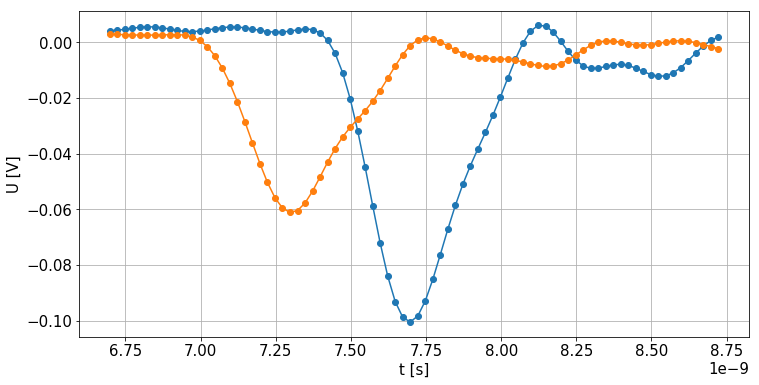

showRawPulse done


In [3]:
M18_02 = analyseMeasurement(rawdataFolder, campaignId, measurementId, signalAmplitude, diagnose = True)

M18_02.read()

M18_02.showRawPulse(pulseNr = 0, style="o-")

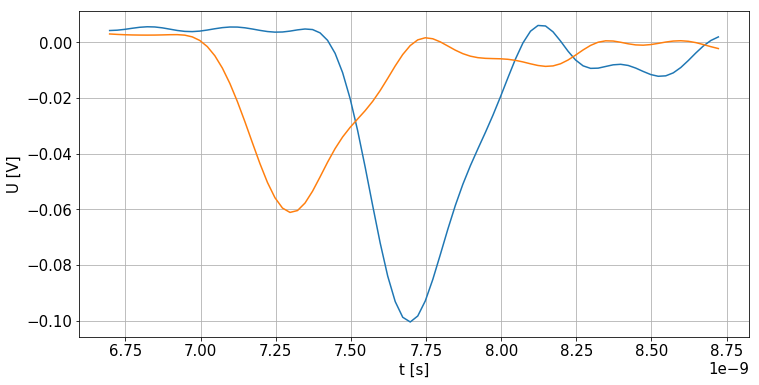

showRawPulse done


In [4]:
M18_02.showRawPulse(pulseNr = 0, style="-")

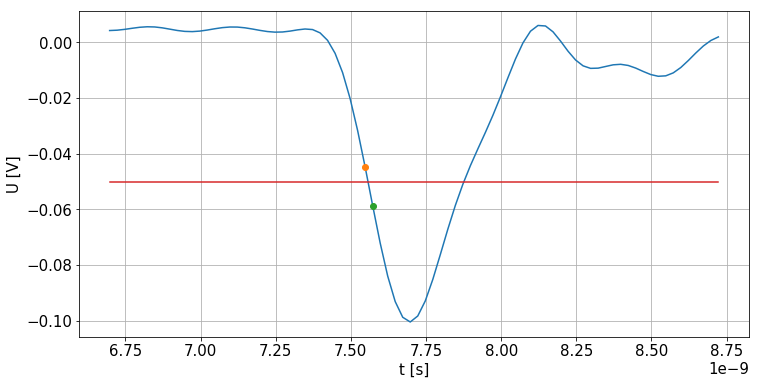

xt: 7.557455547593953e-09 ps, yt -0.05021237991968519 ps


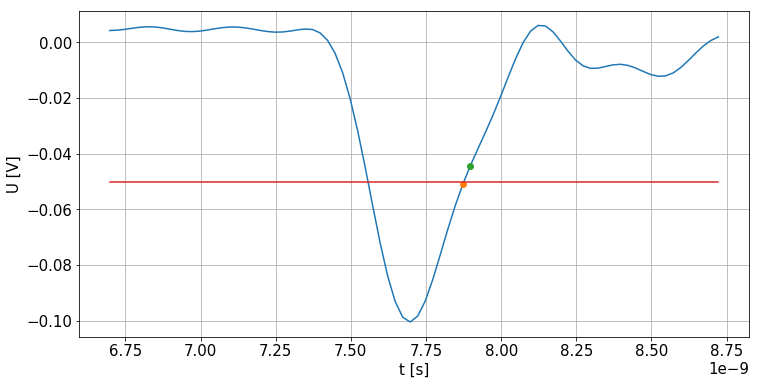

xt: 7.8753657696519e-09 ps, yt -0.05021237991968519 ps


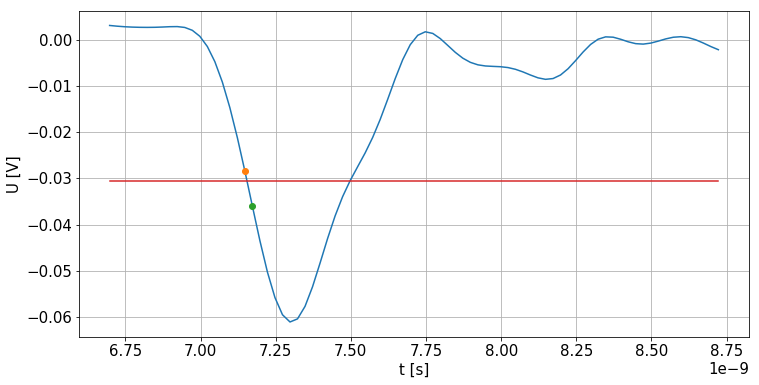

xt: 7.1543706123683434e-09 ps, yt -0.030529896343068685 ps


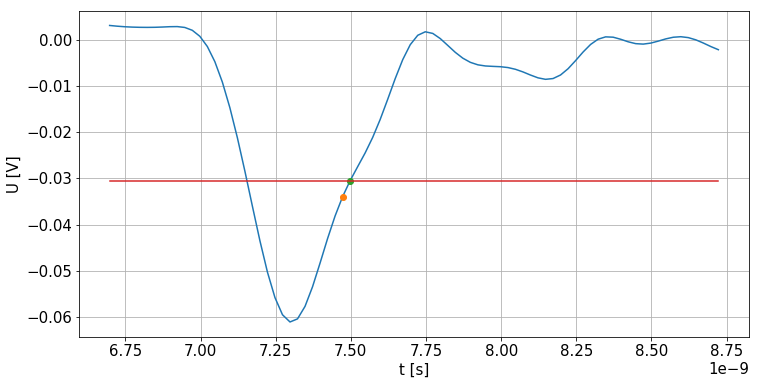

xt: 7.497392483141623e-09 ps, yt -0.030529896343068685 ps
calculateDelta done
calculateDelta done
calculateDelta done


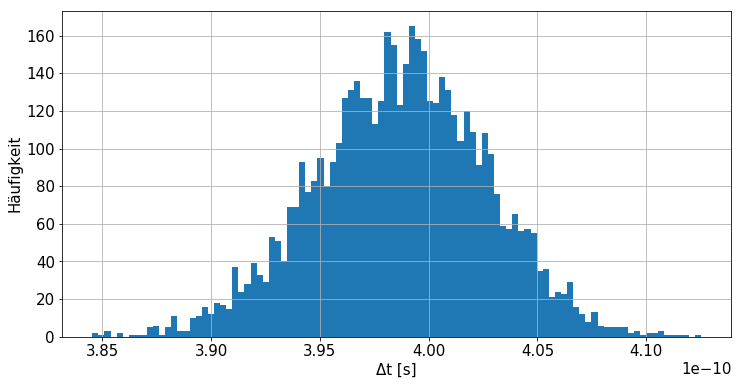

histogram done


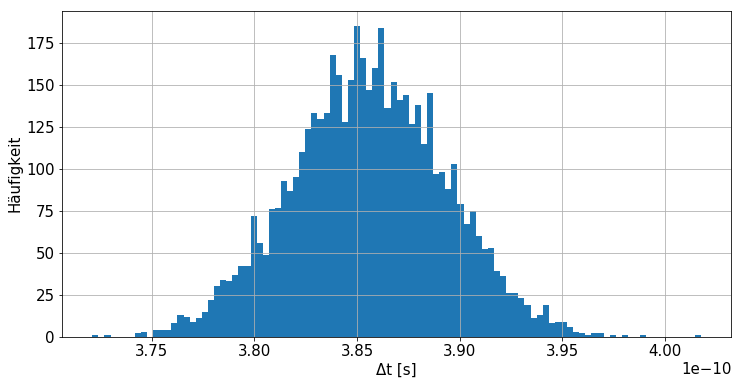

histogram done


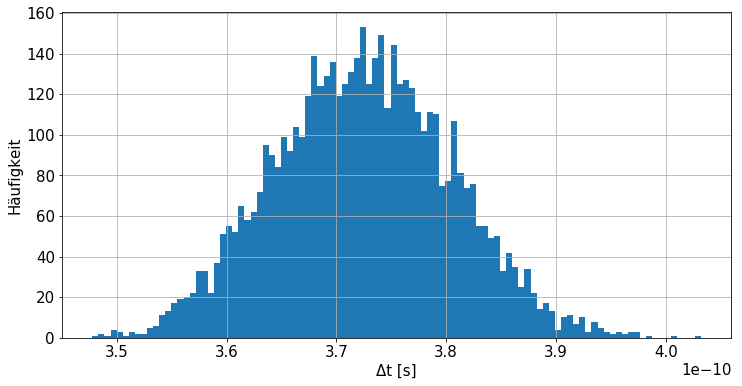

histogram done
52


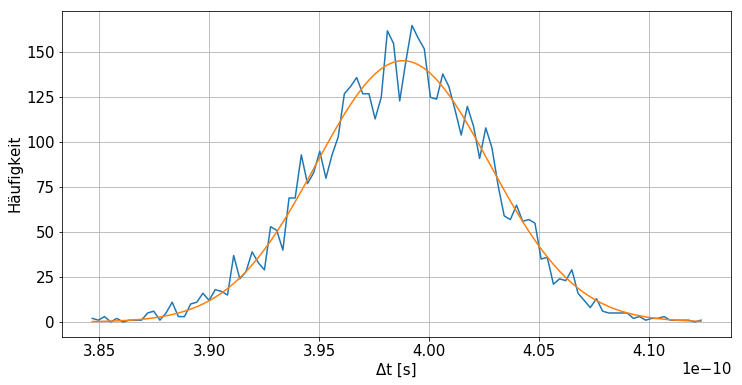

parameter: [1.43466701e-09 3.98815656e-10 3.93537697e-12] [A, mu, sigma]
fitHist done
43


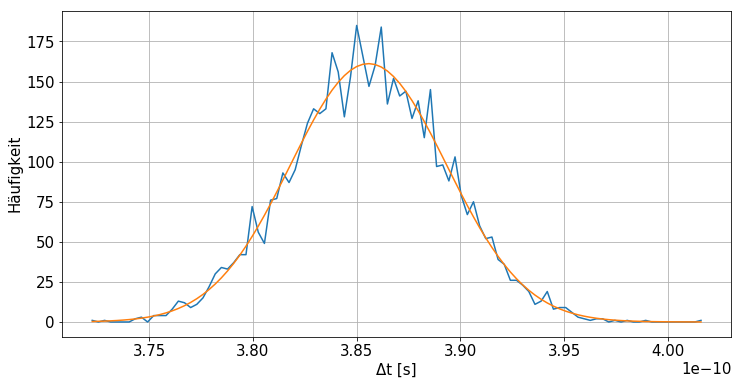

parameter: [1.52373313e-09 3.85573635e-10 3.77095874e-12] [A, mu, sigma]
fitHist done
44


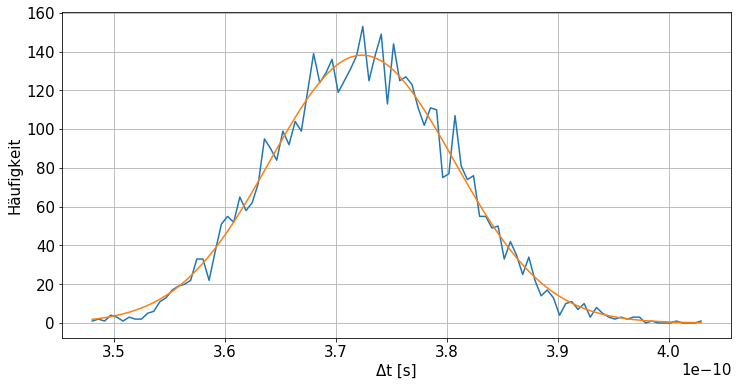

parameter: [2.87089195e-09 3.72367590e-10 8.28536011e-12] [A, mu, sigma]
fitHist done


In [12]:
absolute = False
threshold = 0.5

if(absolute):
    s = "Abs"
else:
    s = "Rel"
name = "thres{:d}".format(int(threshold * 100)) + s
 
M18_02.threshold(absolute = absolute, threshold = threshold)

M18_02.calculateDelta(name + "F", M18_02.data["thres"][name][0,0,:,0], M18_02.data["thres"][name][1,0,:,0])
M18_02.calculateDelta(name + "C", M18_02.data["thres"][name][0,1,:,0], M18_02.data["thres"][name][1,1,:,0])
M18_02.calculateDelta(name + "R", M18_02.data["thres"][name][0,2,:,0], M18_02.data["thres"][name][1,2,:,0])

M18_02.histogram(name + "F", name + "F")
M18_02.histogram(name + "C", name + "C")
M18_02.histogram(name + "R", name + "R")

M18_02.fitHist(name + "F", name + "F")
M18_02.fitHist(name + "C", name + "C")
M18_02.fitHist(name + "R", name + "R")

In [13]:
M18_02.showResult(name + "F")
print("---------------------------------------------------------------------------------------")
M18_02.showResult(name + "C")
print("---------------------------------------------------------------------------------------")
M18_02.showResult(name + "R")

σ_0: 3.9353769704038 ps
σ_1: 2.782731742297898 ps
σ_1 = σ_0 / sqrt(2)

μ: 398.8156560729471 ps

coma separated [σ_0, σ_1, μ]
3.9353769704038e-12,2.782731742297898e-12,3.988156560729471e-10

 tab separated [σ_0, σ_1, μ]
3.9353769704038e-12	2.782731742297898e-12	3.988156560729471e-10
---------------------------------------------------------------------------------------
σ_0: 3.770958735239069 ps
σ_1: 2.6664704932621923 ps
σ_1 = σ_0 / sqrt(2)

μ: 385.57363491883353 ps

coma separated [σ_0, σ_1, μ]
3.770958735239069e-12,2.666470493262192e-12,3.8557363491883353e-10

 tab separated [σ_0, σ_1, μ]
3.770958735239069e-12	2.666470493262192e-12	3.8557363491883353e-10
---------------------------------------------------------------------------------------
σ_0: 8.285360110528726 ps
σ_1: 5.858634318727385 ps
σ_1 = σ_0 / sqrt(2)

μ: 372.36758972416766 ps

coma separated [σ_0, σ_1, μ]
8.285360110528726e-12,5.858634318727385e-12,3.723675897241677e-10

 tab separated [σ_0, σ_1, μ]
8.285360110528726e-12	5.

iPeak: 40 iLeft: 31 iRight: 52


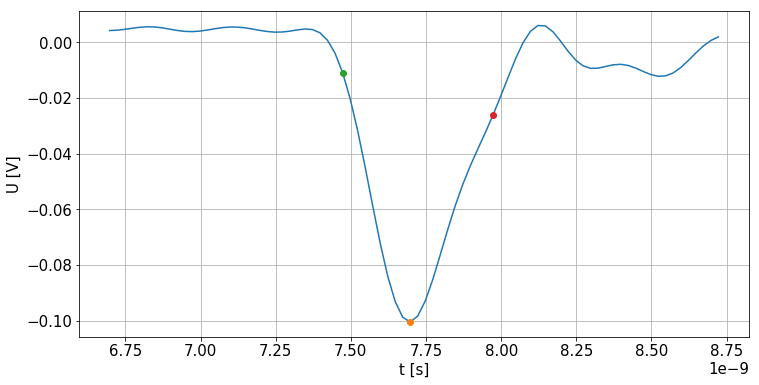

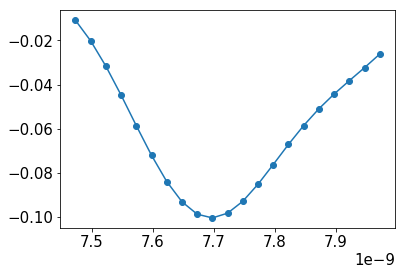

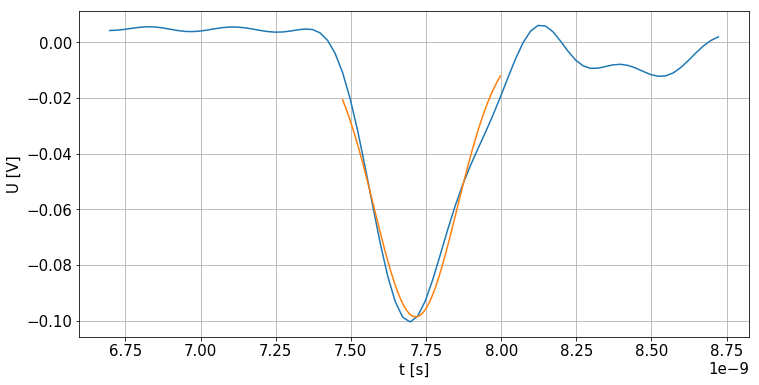

parameter: [-3.39682802e-11  7.71573104e-09  1.37423374e-10] [A, mu, sigma]
iPeak: 24 iLeft: 15 iRight: 38


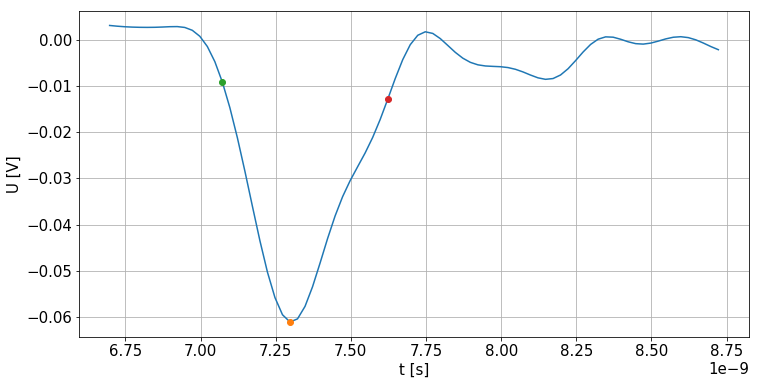

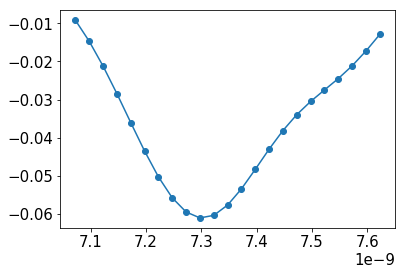

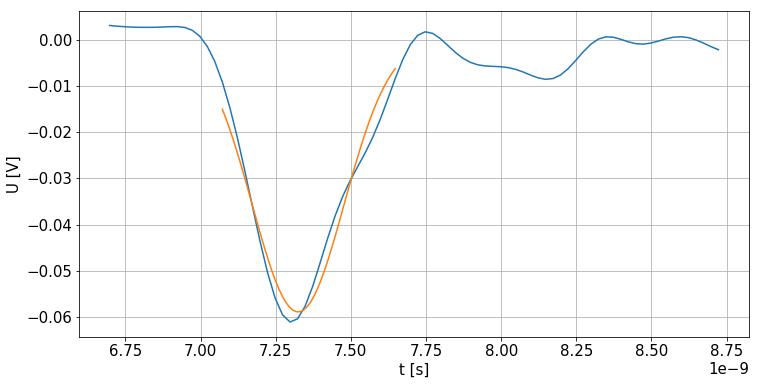

parameter: [-2.25284562e-11  7.32463186e-09  1.52617505e-10] [A, mu, sigma]
fitGauss done
calculateDelta done


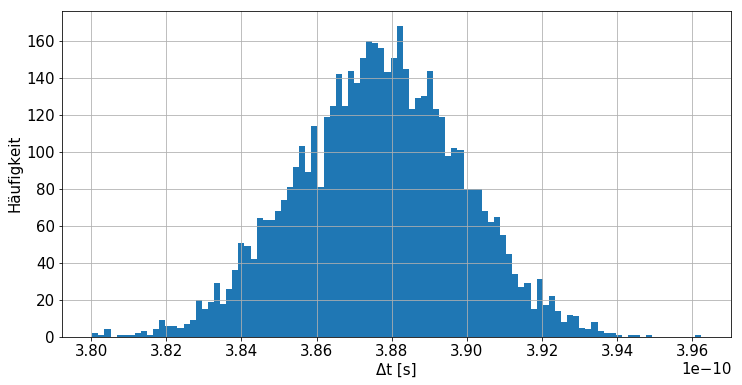

histogram done
50


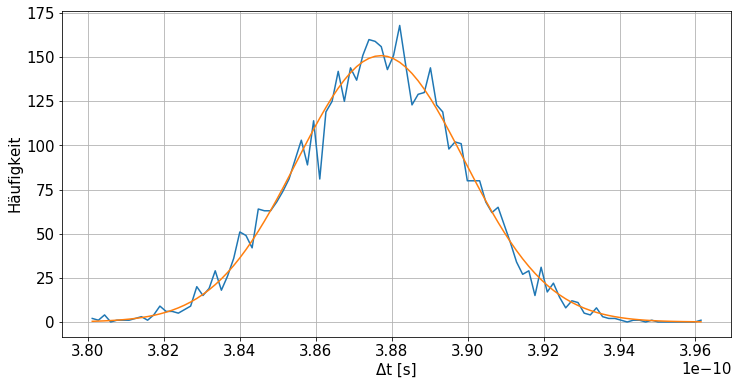

parameter: [8.32647313e-10 3.87714923e-10 2.20116888e-12] [A, mu, sigma]
fitHist done


In [7]:
M18_02.fitGauss(threshold = 0.2, diagnosePulse=0)

M18_02.calculateDelta("gauss", M18_02.data["gauss"][0,:,1], M18_02.data["gauss"][1,:,1])

M18_02.histogram("gauss", "gauss")

M18_02.fitHist("gauss", "gauss")

In [8]:
M18_02.showResult("gauss")

σ_0: 2.2011688808151697 ps
σ_1: 1.5564614421612097 ps
σ_1 = σ_0 / sqrt(2)

μ: 387.7149234684782 ps

coma separated [σ_0, σ_1, μ]
2.2011688808151695e-12,1.5564614421612096e-12,3.877149234684782e-10

 tab separated [σ_0, σ_1, μ]
2.2011688808151695e-12	1.5564614421612096e-12	3.877149234684782e-10


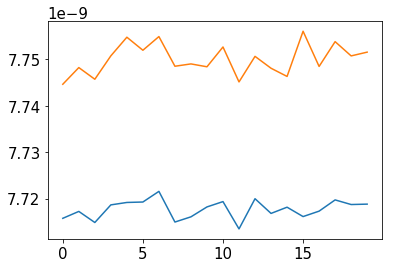

In [9]:
plt.plot(M18_02.data["gauss"][0,:,1][:20])
plt.plot(M18_02.data["gauss"][1,:,1][0:20] + 0.42e-9)

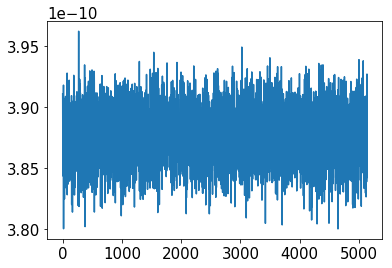

In [10]:
plt.plot(M18_02.data["gauss"][0,:,1] - M18_02.data["gauss"][1,:,1])

In [11]:
%load_ext autoreload

In [ ]:
exportedDict = M18_02.exportDict()
%autoreload
M18_02 = analyseMeasurement(diagnose = True)
M18_02.importDict(exportedDict)